<a href="https://colab.research.google.com/github/Suchitra-V31/Machine-learning-projects/blob/main/Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Video Game Sales Analysis**

In this we are going to analyse our data and predict the Global Sales of the vedio games using Linear Regression...

In [3]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/vgsales.csv')

In [5]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
# let us check whether there is any nan values present in the dataset
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
#let us drop all the nan values
data=data.dropna()

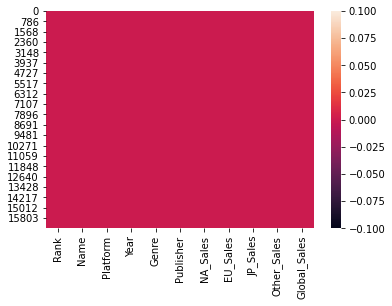

In [10]:
sns.heatmap(data.isnull())

Now we have dropped all the nan values....

Let us see the Top 10 Genre with respect to Rank...

In [11]:
genre=data.groupby('Genre')['Rank'].count().sort_values(ascending=False).head(11)

In [12]:
genre.index

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy'],
      dtype='object', name='Genre')

([<matplotlib.patches.Wedge at 0x7fc1fd7d9890>,
 [Text(0.8759179310694545, 0.6654079786349173, 'Action'),
  Text(-0.2066030537457028, 1.0804236105264224, 'Sports'),
  Text(-0.9173778249796893, 0.6069744032787006, 'Misc'),
  Text(-1.0988282146114616, -0.0507597751550148, 'Role-Playing'),
  Text(-0.9102813557253915, -0.6175660721078704, 'Shooter'),
  Text(-0.4921980257533126, -0.9837383307793499, 'Adventure'),
  Text(0.03900939116031606, -1.0993080857527164, 'Racing'),
  Text(0.48352931463986026, -0.988028036992831, 'Platform'),
  Text(0.7886597037700166, -0.7668219295569147, 'Simulation'),
  Text(0.9976316008908325, -0.4633909676547384, 'Fighting'),
  Text(1.090155287982835, -0.14683816970754757, 'Strategy')])

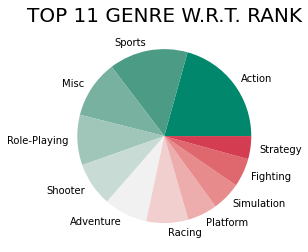

In [13]:
from IPython.core.pylabtools import figsize
colors=['#00876c','#4c9c85','#78b19f','#a0c6b9','#c8dbd5','#f1f1f1','#f1cfce','#eeadad','#e88b8d','#df676e','#d43d51']
plt.title('TOP 11 GENRE W.R.T. RANK',fontsize=20)
plt.pie(genre,labels=genre.index,colors=colors)

In [14]:
genre=data.groupby('Global_Sales')['Name'].count().sort_values(ascending=False).head(5)

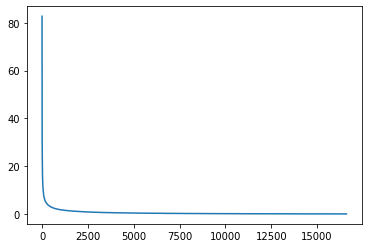

In [15]:
plt.plot(data['Global_Sales'])

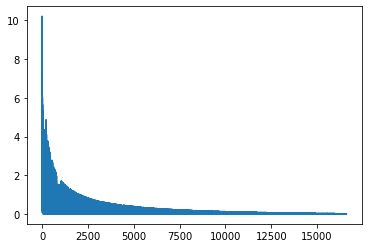

In [16]:
plt.plot(data['JP_Sales'])

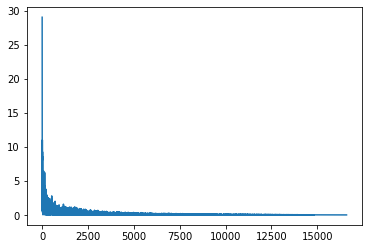

In [17]:
plt.plot(data['EU_Sales'])

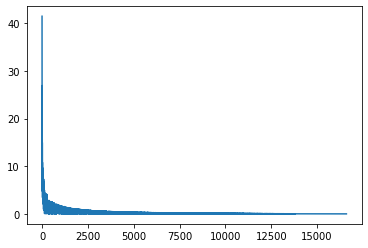

In [18]:
plt.plot(data['NA_Sales'])

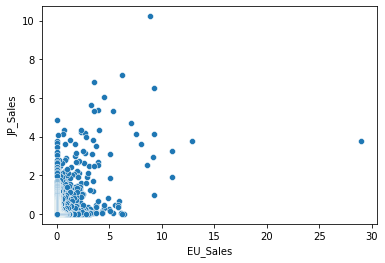

In [19]:
sns.scatterplot(x=data['EU_Sales'],y=data['JP_Sales'])

Let us check the correlation of the data....



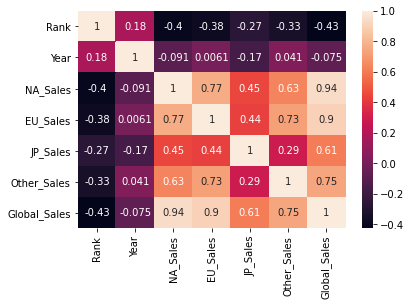

In [20]:
sns.heatmap(data.corr(),annot=True)

We could see that the EU_Sales and NA_Sales are correlated with each other....We can also plot and see the correlation b/w the features...

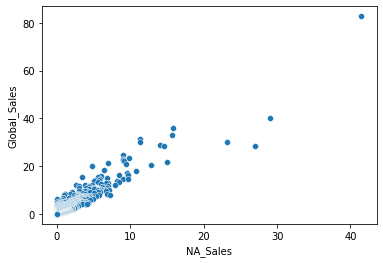

In [21]:
sns.scatterplot(x=data['NA_Sales'],y=data['Global_Sales'])

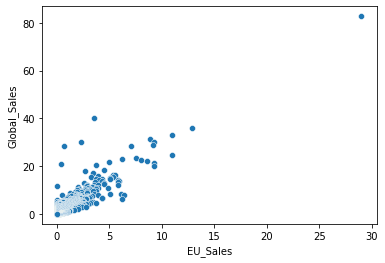

In [22]:
sns.scatterplot(x=data['EU_Sales'],y=data['Global_Sales'])

We could observe the correlation very nicely from this plot....

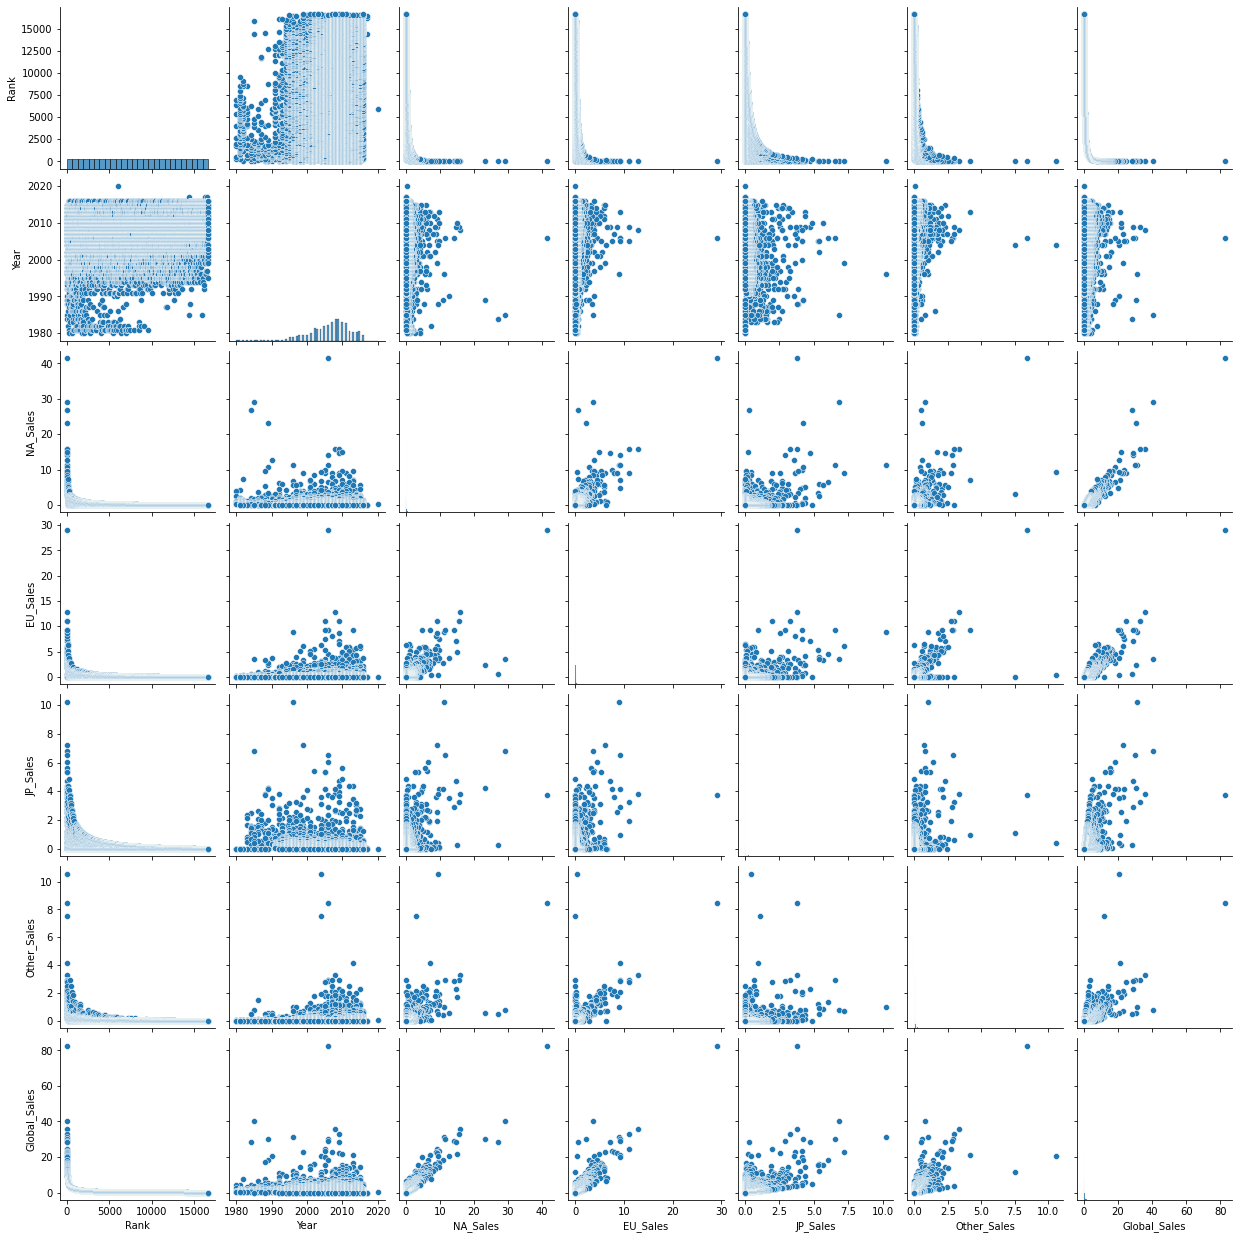

In [23]:
sns.pairplot(data)

In [80]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Let us drop all the columns which are unnecessary....

In [82]:
data.drop(columns=['Name', 'Platform', 'Year', 'Genre', 'Publisher'],axis=1,inplace=True)

In [83]:
data.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41.49,29.02,3.77,8.46,82.74
1,2,29.08,3.58,6.81,0.77,40.24
2,3,15.85,12.88,3.79,3.31,35.82
3,4,15.75,11.01,3.28,2.96,33.00
4,5,11.27,8.89,10.22,1.00,31.37


Before we proceed with training let us standardize our features using StandardScaler...

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler=StandardScaler()

In [86]:
df_scaled=scaler.fit_transform(data)

Create a datframe with our new scaled features...

In [87]:
final_data=pd.DataFrame(df_scaled,columns=data.columns)

In [88]:
final_data.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,-1.729615,50.126469,56.691515,11.835597,44.253501,52.446423
1,-1.729406,35.036615,6.739357,21.583251,3.796218,25.329663
2,-1.729197,18.949687,25.000169,11.899727,17.159222,22.509520
3,-1.728989,18.828093,21.328372,10.264430,15.317863,20.710243
4,-1.728780,13.380668,17.165692,32.517296,5.006254,19.670236


Now.let us train our model with various Sales and try to predict the Global Sales....SO let us split our features into dependent and independent features...

In [89]:
X=final_data[['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
y=final_data['Global_Sales']

In [90]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Linear Regression**

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr=LinearRegression()

In [98]:
model=lr.fit(X_train,y_train)

In [99]:

pred=model.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error

In [101]:
print('MSE: ',mean_squared_error(y_test,pred))

MSE:  1.1618356759306157e-05


We could see that our loss has minimized to the maximum...It shows that our model has predicted well with good accuracy.

Let us also plot and see the inference of our model prediction...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted')

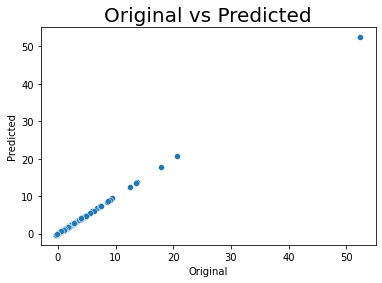

In [102]:
sns.scatterplot(y_test,pred)
plt.title('Original vs Predicted',fontsize=20)
plt.xlabel('Original')
plt.ylabel('Predicted')

We could see that our model has performed very well and has predicted almost accurately to the original value.